# Final Project Submission

Please fill out:
* Student name: Hogan Byun
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Abhineet Kulkarni
* Blog post URL:


**This project will follow the OSEMN process:**
- Obtain
- Scrub
- Explore
- Model
- Interpret

# Obtain

In [1117]:
# Your code here - remember to use markdown cells for comments as well!

In [1118]:
ls

CONTRIBUTING.md    README.md          halfway-there.gif
LICENSE.md         data/              student.ipynb


In [1119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols


In [1120]:
pd.set_option('display.max_columns', 100)

In [1121]:
df = pd.read_csv('data/kc_house_data.csv')

In [1122]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors


In [1123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1124]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see that waterfront, view, and yr_renovated all contain NaN values that must be cleaned.

## Data Cleaning

### sqft_basement

sqft_basement is type object - convert to type int

In [1125]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2390.0        1
1920.0        1
1275.0        1
588.0         1
906.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [1126]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0.0       0.593879
?         0.021021
600.0     0.010048
500.0     0.009677
700.0     0.009631
            ...   
2390.0    0.000046
1920.0    0.000046
1275.0    0.000046
588.0     0.000046
906.0     0.000046
Name: sqft_basement, Length: 304, dtype: float64

There seems to be some '?' as a value for sqft_basement (around 2% of values) and we know that sqft_living and sqft_above don't have '?' values because the data-type for these are int64

Instead of dropping these, remember that the sqft_basement and sqft_above variables should add up to sqft_living.
So, make sqft_basement for these '?' values to be (sqft_living - sqft_above)

In [1127]:
# Test run
df_basement_test = df

In [1128]:
df_basement_test['sqft_basement_test'] = df_basement_test['sqft_living'] - df_basement_test['sqft_above']

In [1129]:
df_basement_test['sqft_basement_test']

0          0
1        400
2          0
3        910
4          0
        ... 
21592      0
21593      0
21594      0
21595      0
21596      0
Name: sqft_basement_test, Length: 21597, dtype: int64

In [1130]:
df_basement_test['sqft_basement_test'].value_counts() / len(df_basement_test['sqft_basement_test'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement_test, Length: 306, dtype: float64

No more '?' values, we can now replace sqft_basement with new values

In [1131]:
df = df.assign(sqft_basement=df_basement_test['sqft_basement_test'])

In [1132]:
df['sqft_basement'].value_counts() / len(df['sqft_basement'])

0       0.607029
600     0.010233
700     0.010094
500     0.009909
800     0.009538
          ...   
792     0.000046
2590    0.000046
935     0.000046
2390    0.000046
248     0.000046
Name: sqft_basement, Length: 306, dtype: float64

In [1133]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'sqft_basement_test'],
      dtype='object')

In [1134]:
df.drop('sqft_basement_test', axis=1, inplace=True)

### Waterfront and yr_renovated

There seem to be missing values in waterfront and yr_renovated - makes sense because not all houses will have waterfronts or be renovated

Investigate waterfront further:

In [1135]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [1136]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.11001527989998611

Waterfront seems to be described as 1 or 0, indicating whether the house has a waterfront (1) or does not have one (0). If not specifically mentioned (NaN), assume there is no waterfront.

In [1137]:
df['waterfront'] = df['waterfront'].fillna(0)

In [1138]:
df['waterfront'].isna().sum() / len(df['waterfront'])

0.0

In [1139]:
# waterfront seems to be 0 or 1, so change data type to int
df['waterfront'] = df['waterfront'].astype(int)

0 seems to be used in a similar way to yr_renovated, so repeat the process with yr_renovated

In [1140]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [1141]:
df['yr_renovated'].isna().sum()

3842

In [1142]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [1143]:
df['yr_renovated'].isna().sum() / len(df['yr_renovated'])

0.0

In [1144]:
# change data type to int
df['yr_renovated'] = df['yr_renovated'].astype(int)

### date

Replace 'date' column with month only -> makes it easier to view as a categorical variable

In [1145]:
df['date_dateformat'] = pd.to_datetime(df['date'])

In [1146]:
df['month'] = df.date_dateformat.dt.month

In [1147]:
df['month'].unique()

array([10, 12,  2,  5,  6,  1,  4,  3,  7,  8, 11,  9])

In [1148]:
df.drop('date_dateformat', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)

### id

No need for id for this particular project

In [1149]:
df.drop('id', axis=1, inplace=True)

### view

There are also NaN values within view. In this case, it was suitable to just drop these rows.

In [1150]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [1151]:
df['view'].isna().sum() / len(df['view'])

0.0029170718155299346

'view' column has 0.3% of its values as NaN - just drop these

In [1152]:
len(df)

21597

In [1153]:
df.dropna(subset=['view'], inplace=True)

In [1154]:
len(df)

21534

Lost 63 rows

In [1155]:
# view seems to be integers, so change data type to int
df['view'] = df['view'].astype(int)

In [1156]:
df['view'].value_counts()

0    19422
2      957
3      508
1      330
4      317
Name: view, dtype: int64

## Colinearity Checks

For this analysis, I am using a threshold of r = 0.8

In [1157]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
price,1.000000,0.308063,0.525053,0.701587,0.090338,0.257052,0.259220,0.395734,0.035393,0.668307,0.605695,0.321816,0.054273,0.117982,-0.053620,0.307868,0.022417,0.585304,0.083189,-0.009691
bedrooms,0.308063,1.000000,0.514368,0.577934,0.032735,0.177391,-0.003733,0.078523,0.026402,0.356095,0.479148,0.302149,0.155462,0.017797,-0.153990,-0.010415,0.132318,0.392874,0.030952,-0.000876
bathrooms,0.525053,0.514368,1.000000,0.755277,0.088921,0.502285,0.061115,0.186451,-0.126682,0.665312,0.686173,0.282563,0.507565,0.046955,-0.204435,0.024487,0.225025,0.569139,0.088854,0.007133
sqft_living,0.701587,0.577934,0.755277,1.000000,0.173768,0.353529,0.101982,0.282532,-0.059783,0.762398,0.876553,0.433930,0.318217,0.050871,-0.199839,0.052383,0.241856,0.756208,0.184801,0.011968
sqft_lot,0.090338,0.032735,0.088921,0.173768,1.000000,-0.005025,0.021465,0.075298,-0.008375,0.115122,0.184325,0.015487,0.052646,0.005091,-0.129846,-0.085143,0.230137,0.145142,0.717095,-0.003504
floors,0.257052,0.177391,0.502285,0.353529,-0.005025,1.000000,0.020357,0.028436,-0.264138,0.458694,0.523367,-0.246203,0.489410,0.003317,-0.058966,0.049419,0.125329,0.279176,-0.010850,0.013782
waterfront,0.259220,-0.003733,0.061115,0.101982,0.021465,0.020357,1.000000,0.382000,0.016224,0.081195,0.069931,0.080684,-0.025000,0.074327,0.029490,-0.012282,-0.037845,0.082352,0.030605,0.008671
view,0.395734,0.078523,0.186451,0.282532,0.075298,0.028436,0.382000,1.000000,0.045735,0.249727,0.166299,0.274887,-0.054564,0.090324,0.085277,0.006141,-0.077894,0.279561,0.073332,-0.005327
condition,0.035393,0.026402,-0.126682,-0.059783,-0.008375,-0.264138,0.016224,0.045735,1.000000,-0.147326,-0.158830,0.173279,-0.361398,-0.055730,0.002125,-0.015594,-0.105475,-0.093172,-0.002702,0.022347
grade,0.668307,0.356095,0.665312,0.762398,0.115122,0.458694,0.081195,0.249727,-0.147326,1.000000,0.755977,0.166673,0.448255,0.015235,-0.185710,0.113787,0.200821,0.713462,0.121435,0.008787


<AxesSubplot:>

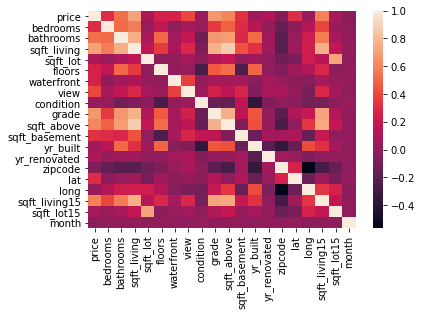

In [1158]:
sns.heatmap(df.corr())

In [1159]:
df.corr() > .8

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
price,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
grade,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


Look at the correlations below and you can notice that sqft_living and sqft_above have an extremely high correlation of .876, which is above my .8 threshold. Thus, one of the two must be removed due to colinearity. Sqft_above was chosen as that column.

sqft_living and sqft_above have a high colinearity of .876 -> drop sqft_above

In [1160]:
df.drop('sqft_above', axis=1, inplace=True)

## Outliers

In [1161]:
# Filter through each column and drop any outliers
for col in ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_living', 'sqft_basement', 'sqft_living15',
           'sqft_lot15']:
    df.drop(df.loc[np.abs(stats.zscore(df[col])) > 3].index, axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19836 non-null  float64
 1   bedrooms       19836 non-null  int64  
 2   bathrooms      19836 non-null  float64
 3   sqft_living    19836 non-null  int64  
 4   sqft_lot       19836 non-null  int64  
 5   floors         19836 non-null  float64
 6   waterfront     19836 non-null  int64  
 7   view           19836 non-null  int64  
 8   condition      19836 non-null  int64  
 9   grade          19836 non-null  int64  
 10  sqft_basement  19836 non-null  int64  
 11  yr_built       19836 non-null  int64  
 12  yr_renovated   19836 non-null  int64  
 13  zipcode        19836 non-null  int64  
 14  lat            19836 non-null  float64
 15  long           19836 non-null  float64
 16  sqft_living15  19836 non-null  int64  
 17  sqft_lot15     19836 non-null  int64  
 18  month 

Lost around 1-2 thousand data points from removing outliers.

## Categorical Variables

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'view'}>],
       [<AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>,
        <AxesSubplot:title={'center':'sqft_basement'}>,
        <AxesSubplot:title={'center':'yr_built'}>],
       [<AxesSubplot:title={'center':'yr_renovated'}>,
        <AxesSubplot:title={'center':'zipcode'}>,
        <AxesSubplot:title={'center':'lat'}>,
        <AxesSubplot:title={'center':'long'}>],
       [<AxesSubplot:title={'center':'sqft_living15'}>,
        <AxesSubplot:title={'center':'sqft_lot15'}>,
        <AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype

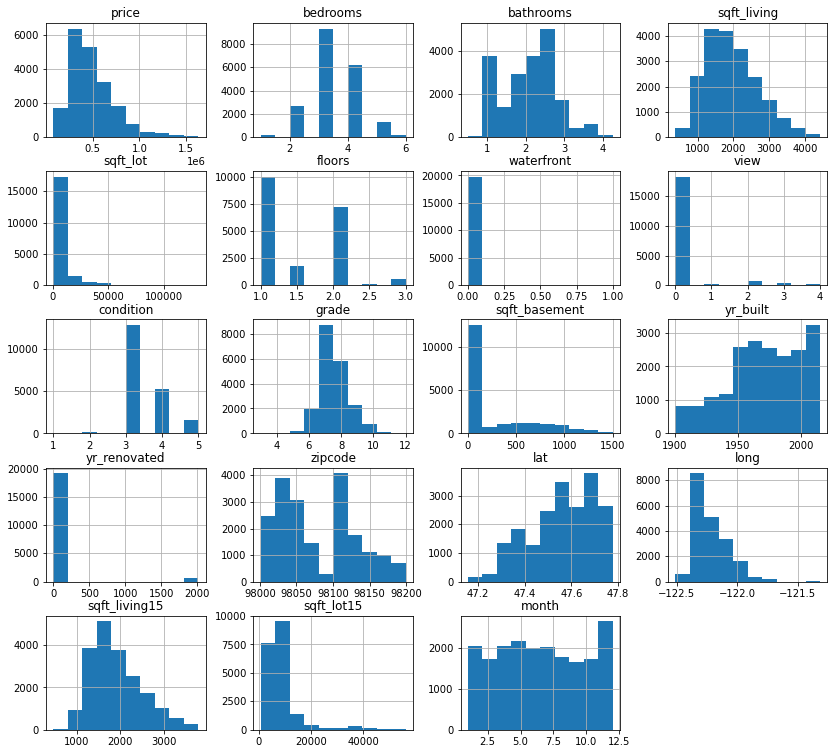

In [1162]:
df.hist(figsize=(14,13))

Now, decide which variables are categorical and thus need dummy columns

**Categorical Variables** 
- id: identifyer
- waterfront: indicates whether a house has a waterfront or not
- view: indicates whether a house has been viewed
- condition: finite grading scale
- grade: finite grading scale -bin 
- zipcode: zipcodes are finite categories - bin
- month: finite 1-12 month - bin into seasons

In [1163]:
# before create dummies, set aside a copy to use for binning later.

bin_df = df

In [1164]:
# create dummy columns for each
waterfront_dummy = pd.get_dummies(df['waterfront'], prefix = 'waterfront', drop_first=True)
view_dummy = pd.get_dummies(df['view'], prefix = 'view', drop_first=True)
condition_dummy = pd.get_dummies(df['condition'], prefix = 'condition', drop_first=True)
grade_dummy = pd.get_dummies(df['grade'], prefix = 'grade', drop_first=True)
zipcode_dummy = pd.get_dummies(df['zipcode'], prefix = 'zipcode', drop_first=True)
month_dummy = pd.get_dummies(df['month'], prefix = 'month', drop_first=True)

In [1165]:
df = df.drop(['waterfront', 'view', 'condition', 'grade', 'zipcode', 'month'], axis=1)
cat_df = pd.concat([waterfront_dummy, view_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                month_dummy], axis=1)
df = pd.concat([df, waterfront_dummy, view_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                month_dummy], axis=1)

In [1166]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.0,3,1.00,1180,5650,1.0,0,1955,0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,538000.0,3,2.25,2570,7242,2.0,400,1951,1991,47.7210,-122.319,1690,7639,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,180000.0,2,1.00,770,10000,1.0,0,1933,0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,0,1987,0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


Now that categorical variables are decided, it's time to remove outliers from continuous variables. Here, an outlier will be treated as a data point that is over 3 standard deviations away from the mean. Also, I am not finding outliers for any data referring to date or location.

In [1167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19836 entries, 0 to 21596
Columns: 111 entries, price to month_12
dtypes: float64(5), int64(8), uint8(98)
memory usage: 4.0 MB


In [1168]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat',
       ...
       'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8',
       'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object', length=111)

### Binning Categorical Variables

Separate categorical variables into groups. This will be used later in its separate model.

Our categorical variables are waterfront, view, condition, grade, zipcode, and month.

**Waterfront**

Does not need binning as there is only 1 or 0 indicating whether a waterfront exists.

**View**

View measures whether a house has been viewed. Its values range from 0 to 4, indicating how many times a house has been viewed. Collapse this into one column of 0 or 1.

In [1169]:
bin_df['view'].value_counts()

0    18290
2      752
3      343
1      281
4      170
Name: view, dtype: int64

In [1170]:
view_bins = [-1, 0, 4]
pd.cut(bin_df['view'], view_bins, labels=['No', 'Yes'])

0        No
1        No
2        No
3        No
4        No
         ..
21592    No
21593    No
21594    No
21595    No
21596    No
Name: view, Length: 19836, dtype: category
Categories (2, object): ['No' < 'Yes']

<AxesSubplot:>

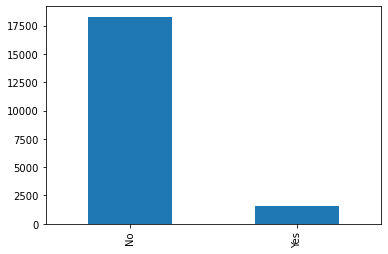

In [1171]:
views_bins = pd.cut(bin_df['view'], view_bins, labels=['No', 'Yes'])
views_bins.value_counts().plot.bar()

In [1172]:
bin_df['viewed'] = views_bins
bin_df.drop('view', axis=1, inplace=True)
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,viewed
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,0,1955,0,98178,47.5112,-122.257,1340,5650,10,No
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,No
2,180000.0,2,1.00,770,10000,1.0,0,3,6,0,1933,0,98028,47.7379,-122.233,2720,8062,2,No
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,910,1965,0,98136,47.5208,-122.393,1360,5000,12,No
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,0,1987,0,98074,47.6168,-122.045,1800,7503,2,No


**Condition**

Condition is graded on a 1-5 scale. This one is hard to bin by criteria as there is none given for a respective grade. Based on the value counts, 3 seems to be the most prevalent. In this case, use the following,

- 1-2 Bad
- 3 Average
- 4 Good
- 5 Excellent

In [1173]:
bin_df['condition'].value_counts()

3    12849
4     5250
5     1556
2      153
1       28
Name: condition, dtype: int64

In [1174]:
condition_bins = [0, 2, 3, 4, 5]
pd.cut(bin_df['condition'], condition_bins, labels=['Bad', 'Average', 'Good', 'Excellent'])

0          Average
1          Average
2          Average
3        Excellent
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 19836, dtype: category
Categories (4, object): ['Bad' < 'Average' < 'Good' < 'Excellent']

<AxesSubplot:>

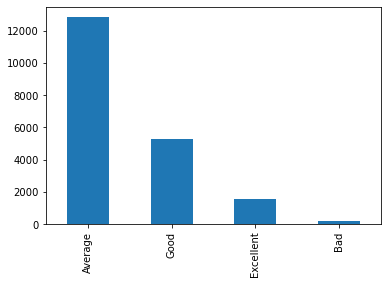

In [1175]:
conditions_bins = pd.cut(bin_df['condition'], condition_bins, labels=['Bad', 'Average', 'Good', 'Excellent'])
conditions_bins.value_counts().plot.bar()

In [1176]:
bin_df['condition'] = conditions_bins
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,viewed
0,221900.0,3,1.00,1180,5650,1.0,0,Average,7,0,1955,0,98178,47.5112,-122.257,1340,5650,10,No
1,538000.0,3,2.25,2570,7242,2.0,0,Average,7,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,No
2,180000.0,2,1.00,770,10000,1.0,0,Average,6,0,1933,0,98028,47.7379,-122.233,2720,8062,2,No
3,604000.0,4,3.00,1960,5000,1.0,0,Excellent,7,910,1965,0,98136,47.5208,-122.393,1360,5000,12,No
4,510000.0,3,2.00,1680,8080,1.0,0,Average,8,0,1987,0,98074,47.6168,-122.045,1800,7503,2,No


**Grade**

Grade is determined by the King County scale:
- 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
- 4 Generally older, low quality construction. Does not meet code.
- 5 Low construction costs and workmanship. Small, simple design.
- 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
- 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
- 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
- 9 Better architectural design with extra interior and exterior design and quality.
- 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
- 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
- 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

Based on these criteria, separate into the following groups:

- 1-5 Failure to meet building codes
- 6 Minimum standards
- 7 Average
- 8-9 Above Average
- 10-13 High Quality

In [1177]:
grade_bins = [0, 5, 6, 7, 9, 13]
pd.cut(bin_df['grade'], grade_bins, labels=['Unacceptable', 'Minimum Standards', 'Average', 
                                            'Above Average', 'High Quality'])

0                  Average
1                  Average
2        Minimum Standards
3                  Average
4            Above Average
               ...        
21592        Above Average
21593        Above Average
21594              Average
21595        Above Average
21596              Average
Name: grade, Length: 19836, dtype: category
Categories (5, object): ['Unacceptable' < 'Minimum Standards' < 'Average' < 'Above Average' < 'High Quality']

<AxesSubplot:>

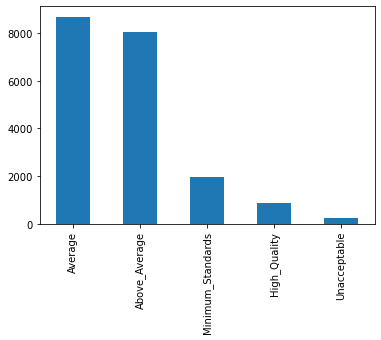

In [1178]:
grades_bins = pd.cut(bin_df['grade'], grade_bins, labels=['Unacceptable', 'Minimum_Standards', 'Average', 
                                                          'Above_Average', 'High_Quality'])
grades_bins.value_counts().plot.bar()

In [1179]:
bin_df['grade'] = grades_bins
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,viewed
0,221900.0,3,1.00,1180,5650,1.0,0,Average,Average,0,1955,0,98178,47.5112,-122.257,1340,5650,10,No
1,538000.0,3,2.25,2570,7242,2.0,0,Average,Average,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,No
2,180000.0,2,1.00,770,10000,1.0,0,Average,Minimum_Standards,0,1933,0,98028,47.7379,-122.233,2720,8062,2,No
3,604000.0,4,3.00,1960,5000,1.0,0,Excellent,Average,910,1965,0,98136,47.5208,-122.393,1360,5000,12,No
4,510000.0,3,2.00,1680,8080,1.0,0,Average,Above_Average,0,1987,0,98074,47.6168,-122.045,1800,7503,2,No


**Zipcode**

Zipcode and corresponding city has been taken from: https://www.zip-codes.com/county/wa-king.asp and organized into a csv file called 'zipcode_city.csv'

In [1180]:
zip_df = pd.read_csv('data/zipcode_city.csv')
zip_df.head()

,Zip Code,City
0,98001,Auburn
1,98002,Auburn
2,98003,Federal_Way
3,98004,Bellevue
4,98005,Bellevue


In [1181]:
# Make sure each zip code corresponds to a singular city ie. do not want one zip code to point to multiple cities
zip_df['Zip Code'].value_counts()

98047    1
98045    1
98108    1
98109    1
98111    1
        ..
98224    1
98001    1
98002    1
98003    1
98050    1
Name: Zip Code, Length: 120, dtype: int64

In [1182]:
# test to make sure a join would suffice
test_df = bin_df
test_df = test_df.join(zip_df.set_index('Zip Code'), on='zipcode', how='left')
test_df['City'].isna().sum()

0

In [1183]:
bin_df = bin_df.join(zip_df.set_index('Zip Code'), on='zipcode', how='left')
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,viewed,City
0,221900.0,3,1.00,1180,5650,1.0,0,Average,Average,0,1955,0,98178,47.5112,-122.257,1340,5650,10,No,Seattle
1,538000.0,3,2.25,2570,7242,2.0,0,Average,Average,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,No,Seattle
2,180000.0,2,1.00,770,10000,1.0,0,Average,Minimum_Standards,0,1933,0,98028,47.7379,-122.233,2720,8062,2,No,Kenmore
3,604000.0,4,3.00,1960,5000,1.0,0,Excellent,Average,910,1965,0,98136,47.5208,-122.393,1360,5000,12,No,Seattle
4,510000.0,3,2.00,1680,8080,1.0,0,Average,Above_Average,0,1987,0,98074,47.6168,-122.045,1800,7503,2,No,Sammamish


In [1184]:
bin_df['City'].nunique()

24

In [1185]:
bin_df.drop('zipcode', axis=1, inplace=True)

**Month**

Separate into seasons
- Dec. to Feb.: Winter
- Mar. to May: Spring
- Jun. to Aug.: Summer
- Sep. to Nov.: Fall

The issue with seasonal bins is that winter is December through February so there needs to be a way for a bin to include 12, 1, 2. Here, substitute any December with a placeholder 0 to create the bins.

In [1186]:
bin_df.loc[bin_df['month'] == 12, 'month'] = 0

In [1187]:
# December is now represented as 0
bin_df['month'].value_counts()

5     2175
4     2054
7     2021
6     2006
8     1786
3     1728
10    1723
9     1645
0     1350
11    1301
2     1159
1      888
Name: month, dtype: int64

In [1188]:
month_bins = [-1, 2, 5, 8, 11]
pd.cut(bin_df['month'], month_bins, labels=['Winter', 'Spring', 'Summer', 'Fall'])

0          Fall
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
21592    Spring
21593    Winter
21594    Summer
21595    Winter
21596      Fall
Name: month, Length: 19836, dtype: category
Categories (4, object): ['Winter' < 'Spring' < 'Summer' < 'Fall']

<AxesSubplot:>

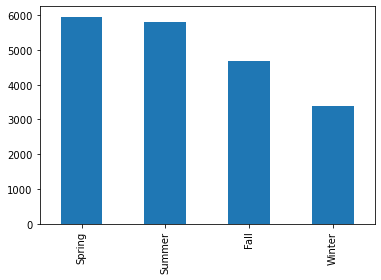

In [1189]:
season_bins = pd.cut(bin_df['month'], month_bins, labels=['Winter', 'Spring', 'Summer', 'Fall'])
season_bins.value_counts().plot.bar()

In [1190]:
bin_df['season'] = season_bins
bin_df.drop('month', axis=1, inplace=True)
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,viewed,City,season
0,221900.0,3,1.00,1180,5650,1.0,0,Average,Average,0,1955,0,47.5112,-122.257,1340,5650,No,Seattle,Fall
1,538000.0,3,2.25,2570,7242,2.0,0,Average,Average,400,1951,1991,47.7210,-122.319,1690,7639,No,Seattle,Winter
2,180000.0,2,1.00,770,10000,1.0,0,Average,Minimum_Standards,0,1933,0,47.7379,-122.233,2720,8062,No,Kenmore,Winter
3,604000.0,4,3.00,1960,5000,1.0,0,Excellent,Average,910,1965,0,47.5208,-122.393,1360,5000,No,Seattle,Winter
4,510000.0,3,2.00,1680,8080,1.0,0,Average,Above_Average,0,1987,0,47.6168,-122.045,1800,7503,No,Sammamish,Winter


**Dummy Variables**

Now create dummy variables for the binned variables

In [1191]:
# create dummy columns for each
waterfront_dummy = pd.get_dummies(bin_df['waterfront'], prefix = 'waterfront', drop_first=True)
view_dummy = pd.get_dummies(bin_df['viewed'], prefix = 'view', drop_first=True)
condition_dummy = pd.get_dummies(bin_df['condition'], prefix = 'condition', drop_first=True)
grade_dummy = pd.get_dummies(bin_df['grade'], prefix = 'grade', drop_first=True)
zipcode_dummy = pd.get_dummies(bin_df['City'], prefix = 'city', drop_first=True)
season_dummy = pd.get_dummies(bin_df['season'], prefix = 'season', drop_first=True)

In [1192]:
bin_df = bin_df.drop(['waterfront', 'viewed', 'condition', 'grade', 'City', 'season'], axis=1)
bin_cat_df = pd.concat([waterfront_dummy, view_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                season_dummy], axis=1)
bin_df = pd.concat([bin_df, waterfront_dummy, view_dummy, condition_dummy, grade_dummy, zipcode_dummy,
                season_dummy], axis=1)

In [1193]:
bin_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_Yes,condition_Average,condition_Good,condition_Excellent,grade_Minimum_Standards,grade_Average,grade_Above_Average,grade_High_Quality,city_Bellevue,city_Black_Diamond,city_Bothell,city_Carnation,city_Duvall,city_Enumclaw,city_Fall_City,city_Federal_Way,city_Issaquah,city_Kenmore,city_Kent,city_Kirkland,city_Maple_Valley,city_Medina,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville,season_Spring,season_Summer,season_Fall
0,221900.0,3,1.00,1180,5650,1.0,0,1955,0,47.5112,-122.257,1340,5650,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,538000.0,3,2.25,2570,7242,2.0,400,1951,1991,47.7210,-122.319,1690,7639,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1.0,0,1933,0,47.7379,-122.233,2720,8062,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,910,1965,0,47.5208,-122.393,1360,5000,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1.0,0,1987,0,47.6168,-122.045,1800,7503,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Continuous Variables

Determine continuous variables and log transform for normality


**Continuous variables**

- bedrooms
- bathrooms
- sqft_lot
- floors
- sqft_living
- sqft_basement - dropped due to 0 values for log transform
- yr_built
- yr_renovated
- lat
- long
- sqft_living15
- sqft_lot15

In [1194]:
# create list of continuous variables for log transforms
cont = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_living', 'sqft_living15', 'sqft_lot15']

cont_df = df[cont]

array([[<AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'sqft_lot'}>],
       [<AxesSubplot:title={'center':'floors'}>,
        <AxesSubplot:title={'center':'sqft_living'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

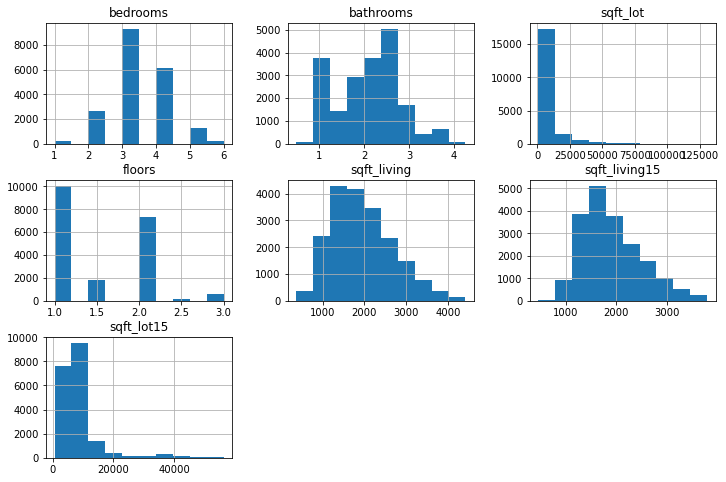

In [1195]:
# A good amount look to be biased towards lower values
cont_df.hist(figsize=(12,8))

In [1196]:
df.drop('sqft_basement', axis=1, inplace=True)

In [1197]:
# log transform for normality
log_cols = [f'{col}_log' for col in cont_df.columns]

cont_log_df = np.log(cont_df)
cont_log_df.columns = log_cols
cont_log_df

,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,1.098612,0.000000,8.639411,0.000000,7.073270,7.200425,8.639411
1,1.098612,0.810930,8.887653,0.693147,7.851661,7.432484,8.941022
2,0.693147,0.000000,9.210340,0.000000,6.646391,7.908387,8.994917
3,1.386294,1.098612,8.517193,0.000000,7.580700,7.215240,8.517193
4,1.098612,0.693147,8.997147,0.000000,7.426549,7.495542,8.923058
...,...,...,...,...,...,...,...
21592,1.098612,0.916291,7.030857,1.098612,7.333023,7.333023,7.319202
21593,1.386294,0.916291,8.667852,0.693147,7.745003,7.512071,8.881836
21594,0.693147,-0.287682,7.207860,0.693147,6.927558,6.927558,7.604396
21595,1.098612,0.916291,7.778211,0.693147,7.377759,7.251345,7.160069


In [1198]:
# create function to stardize values
def standardize(col):
    return (col - col.mean()) / col.std()

cont_log_norm_df = cont_log_df.apply(standardize)
cont_log_norm_df.head()

,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,-0.231294,-1.707722,-0.309821,-0.935577,-1.104888,-1.006221,-0.321210
1,-0.231294,0.434726,0.025236,1.035471,0.902928,-0.241012,0.136071
2,-1.695802,-1.707722,0.460773,-0.935577,-2.205998,1.328267,0.217782
3,0.807791,1.194772,-0.474780,-0.935577,0.203998,-0.957368,-0.506507
4,-0.231294,0.123548,0.173022,-0.935577,-0.193624,-0.033079,0.108835


array([[<AxesSubplot:title={'center':'bedrooms_log'}>,
        <AxesSubplot:title={'center':'bathrooms_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>],
       [<AxesSubplot:title={'center':'floors_log'}>,
        <AxesSubplot:title={'center':'sqft_living_log'}>,
        <AxesSubplot:title={'center':'sqft_living15_log'}>],
       [<AxesSubplot:title={'center':'sqft_lot15_log'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

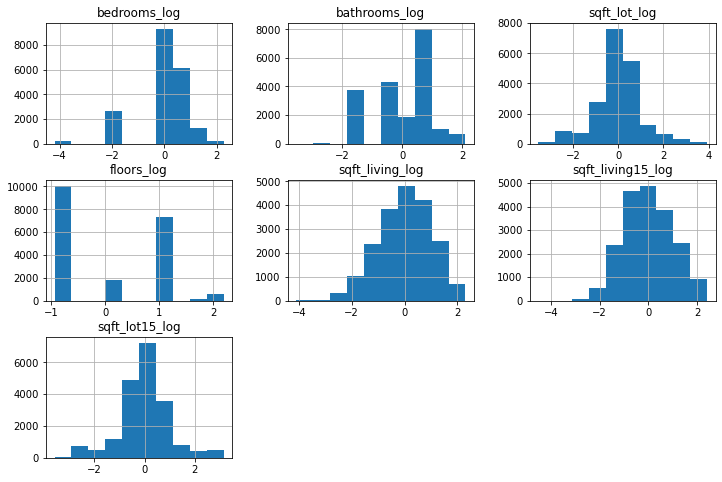

In [1199]:
# values look much more normally distributed
cont_log_norm_df.hist(figsize=(12,8))

In [1200]:
log_df = pd.concat([df, cont_log_norm_df], axis=1)
log_df.drop(['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'sqft_living', 'sqft_living15', 'sqft_lot15'], 
            axis=1, inplace=True)

In [1201]:
log_df

,price,yr_built,yr_renovated,lat,long,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,...,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,bedrooms_log,bathrooms_log,sqft_lot_log,floors_log,sqft_living_log,sqft_living15_log,sqft_lot15_log
0,221900.0,1955,0,47.5112,-122.257,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,-0.231294,-1.707722,-0.309821,-0.935577,-1.104888,-1.006221,-0.321210
1,538000.0,1951,1991,47.7210,-122.319,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-0.231294,0.434726,0.025236,1.035471,0.902928,-0.241012,0.136071
2,180000.0,1933,0,47.7379,-122.233,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-1.695802,-1.707722,0.460773,-0.935577,-2.205998,1.328267,0.217782
3,604000.0,1965,0,47.5208,-122.393,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.807791,1.194772,-0.474780,-0.935577,0.203998,-0.957368,-0.506507
4,510000.0,1987,0,47.6168,-122.045,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,-0.231294,0.123548,0.173022,-0.935577,-0.193624,-0.033079,0.108835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,2009,0,47.6993,-122.346,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,-0.231294,0.713085,-2.480912,2.188460,-0.434869,-0.568982,-2.322812
21593,400000.0,2014,0,47.5107,-122.362,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.807791,0.713085,-0.271433,1.035471,0.627809,0.021426,0.046338
21594,402101.0,2009,0,47.5944,-122.299,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,-1.695802,-2.467768,-2.242009,1.035471,-1.480743,-1.905993,-1.890422
21595,400000.0,2004,0,47.5345,-122.069,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Regression Models

In [1202]:
#X_init = pd.concat([cont_df, cat_df], axis=1)
y = df['price'] # outcome

### Initial Model

This model will be the initial model - without using log transforms on continuous variables

In [1203]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

init_model = ols(formula=formula, data=df).fit()
init_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     923.9
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:12:49   Log-Likelihood:            -2.5606e+05
No. Observations:               19836   AIC:                         5.123e+05
Df Residuals:                   19726   BIC:                         5.132e+05
Df Model:                         109                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -1.38e+07   4.21e+06     -3.280      0.001    -2.2e+07   -5.55e+06
bedrooms      -2918.5026   1100.834     -2.651      0.008   -5076.231    -760.775
bathrooms       1.63e+04   1760.372      9.260      0.000    1.29e+04    1.98e+04
sqft_living     110.1577      2.042     53.944      0.000     106.155     114.160
sqft_lot          1.0986      0.116      9.442      0.000       0.870       1.327
floors        -2778.1097   1818.529     -1.528      0.127   -6342.580     786.360
yr_built       -483.5642     41.996    -11.514      0.000    -565.880    -401.248
yr_renovated     20.7490      2.105      9.857      0.000      16.623      24.875
lat            4.499e+04   4.23e+04      1.064      0.288   -3.79e+04    1.28e+05
long          -1.031e+05   3.13e+04     -3.293      0.001   -1.65e+05   -4.18e+04
sqft_living15    25.7620      2.071     12.441      0.000      21.703      29.821
sqft_lot15       -0.6214      0.174     -3.565      0.000      -0.963      -0.280
waterfront_1   2.427e+05   1.46e+04     16.607      0.000    2.14e+05    2.71e+05
view_1         6.122e+04   6036.501     10.142      0.000    4.94e+04    7.31e+04
view_2         6.575e+04   3794.060     17.329      0.000    5.83e+04    7.32e+04
view_3         1.223e+05   5539.843     22.075      0.000    1.11e+05    1.33e+05
view_4         2.211e+05   9066.951     24.390      0.000    2.03e+05    2.39e+05
condition_2     5.65e+04   2.03e+04      2.785      0.005    1.67e+04    9.63e+04
condition_3     8.01e+04   1.88e+04      4.262      0.000    4.33e+04    1.17e+05
condition_4    1.004e+05   1.88e+04      5.341      0.000    6.36e+04    1.37e+05
condition_5    1.369e+05   1.89e+04      7.232      0.000    9.98e+04    1.74e+05
grade_4       -1.111e+05      1e+05     -1.109      0.268   -3.07e+05    8.53e+04
grade_5       -1.283e+05   9.86e+04     -1.301      0.193   -3.21e+05     6.5e+04
grade_6       -1.196e+05   9.84e+04     -1.215      0.224   -3.12e+05    7.33e+04
grade_7        -1.01e+05   9.84e+04     -1.026      0.305   -2.94e+05    9.19e+04
grade_8       -6.008e+04   9.84e+04     -0.610      0.542   -2.53e+05    1.33e+05
grade_9        3.205e+04   9.85e+04      0.325      0.745   -1.61e+05    2.25e+05
grade_10        1.19e+05   9.85e+04      1.207      0.227   -7.42e+04    3.12e+05
grade_11       2.204e+05    9.9e+04      2.227      0.026    2.65e+04    4.14e+05
grade_12       2.639e+05   1.21e+05      2.188      0.029    2.75e+04       5e+05
zipcode_98002  1.554e+04   8975.619      1.731      0.083   -2057.007    3.31e+04
zipcode_98003 -3586.1066   8033.053     -0.446      0.655   -1.93e+04    1.22e+04
zipcode_98004  5.953e+05   1.57e+04     37.865      0.000    5.65e+05    6.26e+05
zipcode_98005  3.259e+05   1.65e+04     19.697      0.000    2.93e+05    3.58e+05
zipcode_98006  2.547e+05   1.36e+04     18.675   

**Initial Observations:**

- Relatively good R-squared: .836
- waterfront, view, condition, grade, zipcode all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [1204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [1205]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

Calculate Root MSE for train and test sets

In [1206]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 98250.2115508109
Test Root Mean Squarred Error: 96128.14317110502


**Comments:**

Proportionally, there isn't a big difference (around $500). However, the RMSE for both seem quite high.

Test whether the following will improve our model (high R^2, lower RMSE):
- log-transformed continuous variables
- removing zip-code and lat/long data
- binning categorical data

**Model Validation: QQ Plot**

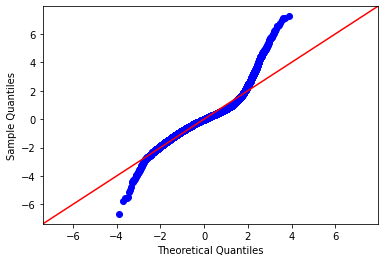

In [1207]:
fig = sm.graphics.qqplot(init_model.resid, dist=stats.norm, line='45', fit=True)

**Model Validation: Heteroscedasticity**

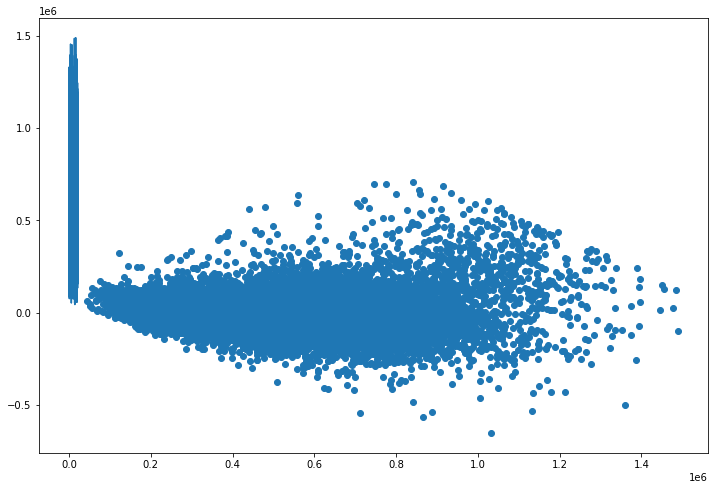

In [1208]:
plt.figure(figsize=(12,8))
plt.scatter(init_model.predict(predictors), init_model.resid)
plt.plot(init_model.predict(predictors, [0 for i in range(len(predictors))]))

### Log Transform Model

In [1209]:
X_log = pd.concat([cont_log_norm_df, cat_df], axis=1)

y = df['price']

In [1210]:
outcome = 'price'
log_predictors = X_log
pred_sum = '+'.join(log_predictors.columns)

In [1211]:
formula = outcome + '~' + pred_sum

In [1212]:
formula

'price~bedrooms_log+bathrooms_log+sqft_lot_log+floors_log+sqft_living_log+sqft_living15_log+sqft_lot15_log+waterfront_1+view_1+view_2+view_3+view_4+condition_2+condition_3+condition_4+condition_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+zipcode_98002+zipcode_98003+zipcode_98004+zipcode_98005+zipcode_98006+zipcode_98007+zipcode_98008+zipcode_98010+zipcode_98011+zipcode_98014+zipcode_98019+zipcode_98022+zipcode_98023+zipcode_98024+zipcode_98027+zipcode_98028+zipcode_98029+zipcode_98030+zipcode_98031+zipcode_98032+zipcode_98033+zipcode_98034+zipcode_98038+zipcode_98039+zipcode_98040+zipcode_98042+zipcode_98045+zipcode_98052+zipcode_98053+zipcode_98055+zipcode_98056+zipcode_98058+zipcode_98059+zipcode_98065+zipcode_98070+zipcode_98072+zipcode_98074+zipcode_98075+zipcode_98077+zipcode_98092+zipcode_98102+zipcode_98103+zipcode_98105+zipcode_98106+zipcode_98107+zipcode_98108+zipcode_98109+zipcode_98112+zipcode_98115+zipcode_98116+zipcode_98117+zipcode_98118+z

In [1213]:
log_model = ols(formula=formula, data=log_df).fit()
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     917.9
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:12:50   Log-Likelihood:            -2.5643e+05
No. Observations:               19836   AIC:                         5.131e+05
Df Residuals:                   19730   BIC:                         5.139e+05
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.448e+05   1.02e+05      3.372      0.001    1.44e+05    5.45e+05
bedrooms_log      -2098.0124    983.233     -2.134      0.033   -4025.232    -170.792
bathrooms_log      4575.3159   1198.558      3.817      0.000    2226.041    6924.591
sqft_lot_log       2.864e+04   1787.479     16.020      0.000    2.51e+04    3.21e+04
floors_log         4594.6983   1006.439      4.565      0.000    2621.993    6567.403
sqft_living_log    7.361e+04   1557.884     47.249      0.000    7.06e+04    7.67e+04
sqft_living15_log  1.355e+04   1209.664     11.205      0.000    1.12e+04    1.59e+04
sqft_lot15_log    -5298.1629   1796.875     -2.949      0.003   -8820.190   -1776.136
waterfront_1       2.415e+05   1.49e+04     16.249      0.000    2.12e+05    2.71e+05
view_1             6.585e+04   6143.442     10.718      0.000    5.38e+04    7.79e+04
view_2             6.974e+04   3857.126     18.082      0.000    6.22e+04    7.73e+04
view_3             1.319e+05   5629.174     23.439      0.000    1.21e+05    1.43e+05
view_4              2.26e+05   9220.966     24.514      0.000    2.08e+05    2.44e+05
condition_2        6.251e+04   2.07e+04      3.025      0.002     2.2e+04    1.03e+05
condition_3        8.649e+04   1.91e+04      4.518      0.000     4.9e+04    1.24e+05
condition_4         1.06e+05   1.92e+04      5.535      0.000    6.85e+04    1.44e+05
condition_5        1.475e+05   1.93e+04      7.649      0.000     1.1e+05    1.85e+05
grade_4           -1.336e+05   1.02e+05     -1.309      0.190   -3.34e+05    6.64e+04
grade_5           -1.834e+05      1e+05     -1.826      0.068    -3.8e+05    1.35e+04
grade_6           -1.966e+05      1e+05     -1.961      0.050   -3.93e+05     -79.579
grade_7           -1.968e+05      1e+05     -1.963      0.050   -3.93e+05    -290.993
grade_8            -1.56e+05      1e+05     -1.556      0.120   -3.53e+05    4.06e+04
grade_9            -5.19e+04      1e+05     -0.517      0.605   -2.49e+05    1.45e+05
grade_10           5.193e+04      1e+05      0.517      0.605   -1.45e+05    2.49e+05
grade_11           1.712e+05   1.01e+05      1.699      0.089   -2.63e+04    3.69e+05
grade_12           2.611e+05   1.23e+05      2.126      0.034    2.04e+04    5.02e+05
zipcode_98002       2.15e+04   8959.867      2.399      0.016    3936.950    3.91e+04
zipcode_98003      6240.1922   8086.552      0.772      0.440   -9610.130    2.21e+04
zipcode_98004      6.198e+05   8718.081     71.094      0.000    6.03e+05    6.37e+05
zipcode_98005      3.421e+05   1.01e+04     33.981      0.000    3.22e+05    3.62e+05
zipcode_98006      2.677e+05   7478.039     35.801      0.000    2.53e+05    2.82e+05
zipcode_98007      2.614e+05   1.02e+04     25.671      0.000    2.41e+05    2.81e+05
zipcode_98008      2.578e+05   8142.756     31.659      0.000    2.42e+05

**Initial Observations:**

- Relatively good R-squared: .830 -> decreased from .836
- waterfront, view, condition, grade, zipcode all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [1214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(log_predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [1215]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [1216]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 99271.43019742382
Test Root Mean Squarred Error: 101026.30882196364


**Comments:**

Proportionally, there isn't a big difference (around $500). However, the RMSE for both seem quite high.

Test whether the following will improve our model (high R^2, lower RMSE):
- log-transformed continuous variables
- removing zip-code and lat/long data
- non-linear/polynomial regression

**Model Validation: QQ Plot**

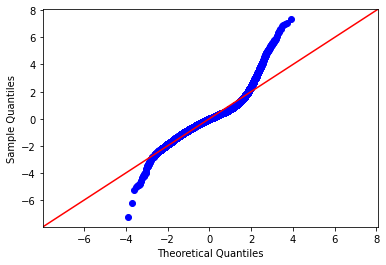

In [1217]:
fig = sm.graphics.qqplot(log_model.resid, dist=stats.norm, line='45', fit=True)

**Model Validation: Heteroscedasticity**

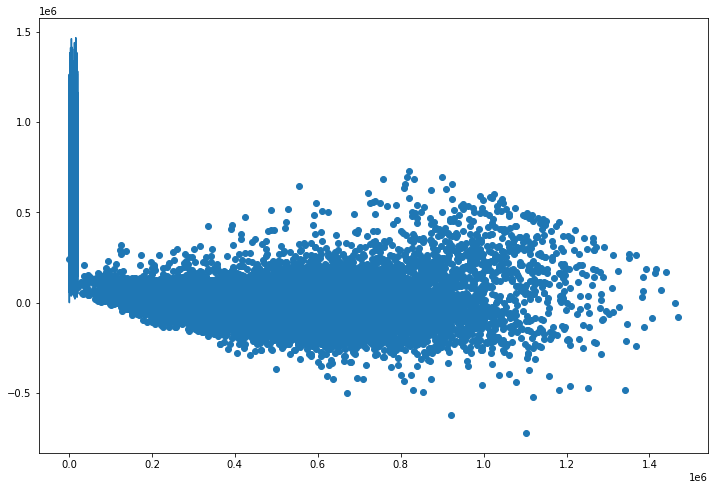

In [1218]:
plt.figure(figsize=(12,8))
plt.scatter(log_model.predict(log_predictors), log_model.resid)
plt.plot(log_model.predict(log_predictors, [0 for i in range(len(log_predictors))]))

### Removing Zip Code and Long/Lat Data

In [1219]:
# this list will be used to make predictors
drop_list = ['price']
# this list will be used for data in ols
drop_list2 = []
for col in df.columns:
    if ('lat' in col) | ('long' in col) | ('zip' in col):
        drop_list.append(col)
        drop_list2.append(col)
drop_list

['price',
 'lat',
 'long',
 'zipcode_98002',
 'zipcode_98003',
 'zipcode_98004',
 'zipcode_98005',
 'zipcode_98006',
 'zipcode_98007',
 'zipcode_98008',
 'zipcode_98010',
 'zipcode_98011',
 'zipcode_98014',
 'zipcode_98019',
 'zipcode_98022',
 'zipcode_98023',
 'zipcode_98024',
 'zipcode_98027',
 'zipcode_98028',
 'zipcode_98029',
 'zipcode_98030',
 'zipcode_98031',
 'zipcode_98032',
 'zipcode_98033',
 'zipcode_98034',
 'zipcode_98038',
 'zipcode_98039',
 'zipcode_98040',
 'zipcode_98042',
 'zipcode_98045',
 'zipcode_98052',
 'zipcode_98053',
 'zipcode_98055',
 'zipcode_98056',
 'zipcode_98058',
 'zipcode_98059',
 'zipcode_98065',
 'zipcode_98070',
 'zipcode_98072',
 'zipcode_98074',
 'zipcode_98075',
 'zipcode_98077',
 'zipcode_98092',
 'zipcode_98102',
 'zipcode_98103',
 'zipcode_98105',
 'zipcode_98106',
 'zipcode_98107',
 'zipcode_98108',
 'zipcode_98109',
 'zipcode_98112',
 'zipcode_98115',
 'zipcode_98116',
 'zipcode_98117',
 'zipcode_98118',
 'zipcode_98119',
 'zipcode_98122',
 

In [1220]:
df.drop(columns = drop_list)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,sqft_living15,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,3,1.00,1180,5650,1.0,1955,0,1340,5650,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,3,2.25,2570,7242,2.0,1951,1991,1690,7639,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,2,1.00,770,10000,1.0,1933,0,2720,8062,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,4,3.00,1960,5000,1.0,1965,0,1360,5000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,3,2.00,1680,8080,1.0,1987,0,1800,7503,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,2009,0,1530,1509,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21593,4,2.50,2310,5813,2.0,2014,0,1830,7200,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,2,0.75,1020,1350,2.0,2009,0,1020,2007,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,3,2.50,1600,2388,2.0,2004,0,1410,1287,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1221]:
outcome = 'price'
no_zip_predictors = df.drop(columns = drop_list)
pred_sum = '+'.join(no_zip_predictors.columns)

In [1222]:
formula = outcome + '~' + pred_sum
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+yr_built+yr_renovated+sqft_living15+sqft_lot15+waterfront_1+view_1+view_2+view_3+view_4+condition_2+condition_3+condition_4+condition_5+grade_4+grade_5+grade_6+grade_7+grade_8+grade_9+grade_10+grade_11+grade_12+month_2+month_3+month_4+month_5+month_6+month_7+month_8+month_9+month_10+month_11+month_12'

In [1223]:
no_zip_df = df.drop(columns = drop_list2)

In [1224]:
no_zip_model = ols(formula=formula, data=no_zip_df).fit()
no_zip_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     788.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:12:51   Log-Likelihood:            -2.6486e+05
No. Observations:               19836   AIC:                         5.298e+05
Df Residuals:                   19797   BIC:                         5.301e+05
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      5.737e+06   1.85e+05     30.981      0.000    5.37e+06     6.1e+06
bedrooms      -1.723e+04   1680.188    -10.254      0.000   -2.05e+04   -1.39e+04
bathrooms      3.761e+04   2706.677     13.895      0.000    3.23e+04    4.29e+04
sqft_living      87.2674      3.132     27.859      0.000      81.128      93.407
sqft_lot          0.0802      0.180      0.446      0.655      -0.272       0.433
floors         3.322e+04   2642.778     12.570      0.000     2.8e+04    3.84e+04
yr_built      -2964.1323     53.110    -55.811      0.000   -3068.232   -2860.033
yr_renovated     11.1374      3.246      3.431      0.001       4.775      17.499
sqft_living15    44.8090      2.978     15.044      0.000      38.971      50.647
sqft_lot15       -2.4565      0.257     -9.554      0.000      -2.960      -1.953
waterfront_1   1.763e+05   2.23e+04      7.894      0.000    1.33e+05     2.2e+05
view_1          7.86e+04   9250.158      8.497      0.000    6.05e+04    9.67e+04
view_2          5.65e+04   5785.286      9.766      0.000    4.52e+04    6.78e+04
view_3         8.936e+04   8460.280     10.562      0.000    7.28e+04    1.06e+05
view_4         1.841e+05   1.39e+04     13.226      0.000    1.57e+05    2.11e+05
condition_2   -1175.7867   3.15e+04     -0.037      0.970   -6.29e+04    6.05e+04
condition_3    3.438e+04   2.91e+04      1.180      0.238   -2.28e+04    9.15e+04
condition_4    5.306e+04   2.92e+04      1.820      0.069   -4082.880     1.1e+05
condition_5    8.958e+04   2.93e+04      3.054      0.002    3.21e+04    1.47e+05
grade_4        2.303e+04   1.55e+05      0.148      0.882   -2.82e+05    3.28e+05
grade_5        1.913e+04   1.53e+05      0.125      0.900   -2.81e+05    3.19e+05
grade_6        7.775e+04   1.53e+05      0.509      0.610   -2.21e+05    3.77e+05
grade_7        1.673e+05   1.53e+05      1.096      0.273   -1.32e+05    4.66e+05
grade_8        2.661e+05   1.53e+05      1.743      0.081   -3.32e+04    5.65e+05
grade_9         4.06e+05   1.53e+05      2.659      0.008    1.07e+05    7.05e+05
grade_10       5.304e+05   1.53e+05      3.471      0.001    2.31e+05     8.3e+05
grade_11       6.464e+05   1.53e+05      4.213      0.000    3.46e+05    9.47e+05
grade_12       7.957e+05   1.87e+05      4.255      0.000    4.29e+05    1.16e+06
month_2        5877.9943   6806.202      0.864      0.388   -7462.731    1.92e+04
month_3         2.83e+04   6298.611      4.493      0.000     1.6e+04    4.06e+04
month_4        3.533e+04   6127.999      5.765      0.000    2.33e+04    4.73e+04
month_5        1.421e+04   6077.087      2.338      0.019    2296.962    2.61e+04
month_6        6972.9597   6154.982      1.133      0.257   -5091.320     1.9e+04
month_7        2455.2810   6147.781      0.399      0.690   -9594.885    1.45e+04
month_8        1715.0650   6269.679      0.274   

**Initial Observations:**

- R-squared dropped considerably -> decreased from .836 to .602
- waterfront, view, condition, grade all appear to have strong effects on the model

**Model Validation: Train-Test Split**

In [1225]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(no_zip_predictors, y, test_size=0.2)

print(len(X_train), len(X_test), len(y_train), len(y_test))

15868 3968 15868 3968


In [1226]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [1227]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Root Mean Squarred Error:', np.sqrt(train_mse))
print('Test Root Mean Squarred Error:', np.sqrt(test_mse))

Train Root Mean Squarred Error: 152608.1535399299
Test Root Mean Squarred Error: 151241.65502599342


**Comments:**

Proportionally, there isn't a big difference (around $3000). However, the RMSE for both seem quite high.

This provided a worse RMSE than the initial model

**Model Validation: QQ Plot**

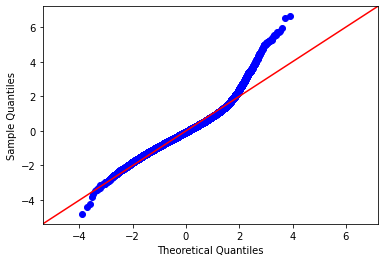

In [1228]:
fig = sm.graphics.qqplot(no_zip_model.resid, dist=stats.norm, line='45', fit=True)

**Model Validation: Heteroscedasticity**

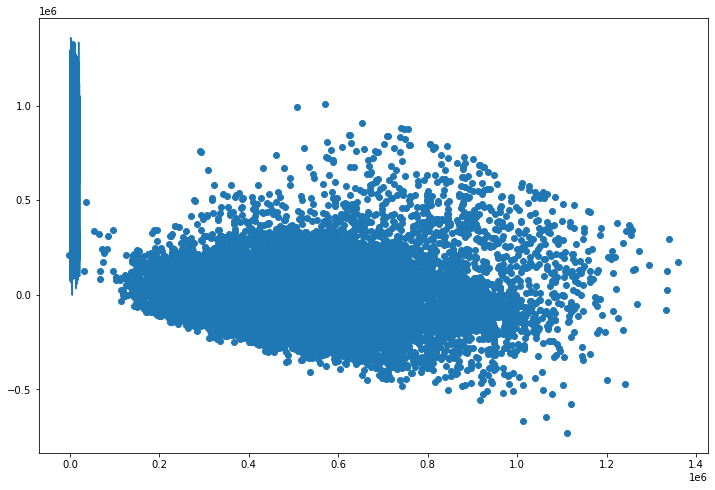

In [1229]:
plt.figure(figsize=(12,8))
plt.scatter(no_zip_model.predict(no_zip_predictors), no_zip_model.resid)
plt.plot(no_zip_model.predict(no_zip_predictors, [0 for i in range(len(no_zip_predictors))]))

### Binned Categorical Model

In [1230]:
outcome = 'price'
bin_predictors = bin_df.drop('price', axis=1)
pred_sum = '+'.join(bin_predictors.columns)
formula = outcome + '~' + pred_sum

init_model = ols(formula=formula, data=bin_df).fit()
init_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     1159.
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:12:52   Log-Likelihood:            -2.6089e+05
No. Observations:               19836   AIC:                         5.219e+05
Df Residuals:                   19788   BIC:                         5.223e+05
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -6.111e+07   2.76e+06    -22.174      0.000   -6.65e+07   -5.57e+07
bedrooms                -1.606e+04   1382.155    -11.623      0.000   -1.88e+04   -1.34e+04
bathrooms                 2.94e+04   2255.805     13.034      0.000     2.5e+04    3.38e+04
sqft_living               124.1927      2.737     45.378      0.000     118.828     129.557
sqft_lot                    0.7166      0.148      4.849      0.000       0.427       1.006
floors                   2.909e+04   2517.247     11.558      0.000    2.42e+04     3.4e+04
sqft_basement             -24.0043      3.207     -7.485      0.000     -30.290     -17.719
yr_built                -1546.2914     49.586    -31.184      0.000   -1643.483   -1449.099
yr_renovated               18.1110      2.668      6.788      0.000      12.881      23.341
lat                       5.32e+05   1.38e+04     38.547      0.000    5.05e+05    5.59e+05
long                    -3.175e+05   2.22e+04    -14.302      0.000   -3.61e+05   -2.74e+05
sqft_living15              47.5909      2.577     18.471      0.000      42.541      52.641
sqft_lot15                 -1.5896      0.217     -7.310      0.000      -2.016      -1.163
waterfront_1             3.033e+05   1.61e+04     18.793      0.000    2.72e+05    3.35e+05
view_Yes                 8.414e+04   3645.828     23.078      0.000     7.7e+04    9.13e+04
condition_Average        3.121e+04   9520.633      3.279      0.001    1.26e+04    4.99e+04
condition_Good           5.089e+04   9566.249      5.320      0.000    3.21e+04    6.96e+04
condition_Excellent      8.902e+04   9954.776      8.942      0.000    6.95e+04    1.09e+05
grade_Minimum_Standards  1.253e+04   8408.493      1.490      0.136   -3950.990     2.9e+04
grade_Average            5.368e+04   8246.943      6.509      0.000    3.75e+04    6.98e+04
grade_Above_Average       1.26e+05   8664.020     14.546      0.000    1.09e+05    1.43e+05
grade_High_Quality       2.824e+05   1.03e+04     27.496      0.000    2.62e+05    3.03e+05
city_Bellevue            1.868e+05   7228.202     25.849      0.000    1.73e+05    2.01e+05
city_Black_Diamond       1.528e+05   1.56e+04      9.772      0.000    1.22e+05    1.83e+05
city_Bothell            -9.775e+04   1.19e+04     -8.244      0.000   -1.21e+05   -7.45e+04
city_Carnation           6.379e+04    1.8e+04      3.537      0.000    2.84e+04    9.91e+04
city_Duvall             -6.007e+04   1.38e+04     -4.356      0.000   -8.71e+04    -3.3e+04
city_Enumclaw            1.329e+05   1.16e+04     11.444      0.000     1.1e+05    1.56e+05
city_Fall_City           1.273e+05   2.14e+04      5.939      0.000    8.53e+04    1.69e+05
city_Federal_Way        -5.564e+04   6805.103     -8.176      0.000    -6.9e+04   -4.23e+04
city_Issaquah            1.271e+05   8729.645  

### Final Model

This is the new modle ->

Significant variables are bathrooms, floors, location (lat, long, zip), waterfront, view, condition, grade, month

## When Are Renovations Worth It?

### Predicting Prices Between Renovated and Non-Renovated Homes

In [1231]:
renov_df = df.loc[df['yr_renovated'] > 0]

In [1232]:
outcome = 'price'
renov_predictors = renov_df.drop('price', axis=1)
pred_sum = '+'.join(renov_predictors.columns)
formula = outcome + '~' + pred_sum

renov_model = ols(formula=formula, data=renov_df).fit()
renov_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     30.43
Date:                Sun, 17 Jan 2021   Prob (F-statistic):          2.33e-169
Time:                        21:12:52   Log-Likelihood:                -8359.3
No. Observations:                 639   AIC:                         1.693e+04
Df Residuals:                     533   BIC:                         1.740e+04
Df Model:                         105                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       2.63e+07   3.01e+07      0.875      0.382   -3.28e+07    8.54e+07
bedrooms      -7891.1295   7620.494     -1.036      0.301   -2.29e+04    7078.758
bathrooms      1.336e+04   1.16e+04      1.156      0.248   -9344.008    3.61e+04
sqft_living     115.5441     12.833      9.003      0.000      90.334     140.754
sqft_lot          1.1468      0.783      1.465      0.143      -0.391       2.684
floors         -1.33e+04   1.34e+04     -0.995      0.320   -3.95e+04    1.29e+04
yr_built       -200.8792    334.880     -0.600      0.549    -858.726     456.968
yr_renovated   1585.5576    430.493      3.683      0.000     739.887    2431.228
lat           -6.978e+04   3.83e+05     -0.182      0.856   -8.23e+05    6.83e+05
long           2.394e+05   2.39e+05      1.000      0.318   -2.31e+05     7.1e+05
sqft_living15    48.1140     14.549      3.307      0.001      19.534      76.694
sqft_lot15       -0.5799      1.269     -0.457      0.648      -3.072       1.912
waterfront_1   2.926e+05   5.99e+04      4.881      0.000    1.75e+05     4.1e+05
view_1         7.064e+04   3.43e+04      2.057      0.040    3164.071    1.38e+05
view_2         1.145e+05   2.41e+04      4.758      0.000    6.72e+04    1.62e+05
view_3         1.255e+05   2.83e+04      4.439      0.000       7e+04    1.81e+05
view_4         1.989e+05   4.28e+04      4.644      0.000    1.15e+05    2.83e+05
condition_2    2.335e+05    1.7e+05      1.376      0.169   -9.98e+04    5.67e+05
condition_3    3.441e+05   1.41e+05      2.442      0.015    6.73e+04    6.21e+05
condition_4    3.363e+05   1.42e+05      2.370      0.018    5.76e+04    6.15e+05
condition_5    3.849e+05   1.44e+05      2.665      0.008    1.01e+05    6.69e+05
grade_4        3.393e+06   3.76e+06      0.902      0.368      -4e+06    1.08e+07
grade_5        3.231e+06   3.76e+06      0.859      0.391   -4.16e+06    1.06e+07
grade_6         3.19e+06   3.76e+06      0.849      0.396   -4.19e+06    1.06e+07
grade_7        3.205e+06   3.76e+06      0.853      0.394   -4.18e+06    1.06e+07
grade_8        3.293e+06   3.76e+06      0.876      0.381   -4.09e+06    1.07e+07
grade_9        3.411e+06   3.76e+06      0.908      0.364   -3.97e+06    1.08e+07
grade_10       3.556e+06   3.76e+06      0.947      0.344   -3.82e+06    1.09e+07
grade_11       3.022e+06   3.76e+06      0.803      0.422   -4.37e+06    1.04e+07
grade_12      -8.428e-07   9.55e-07     -0.883      0.378   -2.72e-06    1.03e-06
zipcode_98002 -5.955e+04   8.96e+04     -0.665      0.506   -2.35e+05    1.16e+05
zipcode_98003 -6.869e+04   1.13e+05     -0.606      0.545   -2.91e+05    1.54e+05
zipcode_98004  5.819e+05   1.46e+05      3.973      0.000    2.94e+05     8.7e+05
zipcode_98005  3.729e+05   1.59e+05      2.346      0.019    6.06e+04    6.85e+05
zipcode_98006  1.392e+05   1.33e+05      1.047   

In [1233]:
not_renov_df = df.loc[df['yr_renovated'] == 0]

In [1234]:
not_renov_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900.0,3,1.00,1180,5650,1.0,1955,0,47.5112,-122.257,1340,5650,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,180000.0,2,1.00,770,10000,1.0,1933,0,47.7379,-122.233,2720,8062,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1.0,1965,0,47.5208,-122.393,1360,5000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,510000.0,3,2.00,1680,8080,1.0,1987,0,47.6168,-122.045,1800,7503,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,257500.0,3,2.25,1715,6819,2.0,1995,0,47.3097,-122.327,2238,6819,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,2009,0,47.6993,-122.346,1530,1509,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
21593,400000.0,4,2.50,2310,5813,2.0,2014,0,47.5107,-122.362,1830,7200,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
21594,402101.0,2,0.75,1020,1350,2.0,2009,0,47.5944,-122.299,1020,2007,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
21595,400000.0,3,2.50,1600,2388,2.0,2004,0,47.5345,-122.069,1410,1287,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [1235]:
outcome = 'price'
non_renov_predictors = not_renov_df.drop('price', axis=1)
pred_sum = '+'.join(non_renov_predictors.columns)
formula = outcome + '~' + pred_sum

not_renov_model = ols(formula=formula, data=not_renov_df).fit()
not_renov_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     905.8
Date:                Sun, 17 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:12:53   Log-Likelihood:            -2.4747e+05
No. Observations:               19197   AIC:                         4.952e+05
Df Residuals:                   19088   BIC:                         4.960e+05
Df Model:                         108                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.521e+07   4.22e+06     -3.603      0.000   -2.35e+07   -6.93e+06
bedrooms      -2784.1750   1105.929     -2.517      0.012   -4951.893    -616.457
bathrooms       1.52e+04   1776.478      8.554      0.000    1.17e+04    1.87e+04
sqft_living     110.0232      2.060     53.413      0.000     105.986     114.061
sqft_lot          1.1101      0.118      9.434      0.000       0.879       1.341
floors        -1056.9152   1828.174     -0.578      0.563   -4640.298    2526.468
yr_built       -475.4073     42.480    -11.191      0.000    -558.672    -392.142
yr_renovated  -5.069e-09   3.24e-09     -1.562      0.118   -1.14e-08    1.29e-09
lat            6.112e+04   4.22e+04      1.449      0.147   -2.15e+04    1.44e+05
long          -1.083e+05   3.15e+04     -3.437      0.001    -1.7e+05   -4.65e+04
sqft_living15    26.4110      2.087     12.653      0.000      22.320      30.503
sqft_lot15       -0.6053      0.176     -3.447      0.001      -0.949      -0.261
waterfront_1   2.457e+05   1.59e+04     15.465      0.000    2.15e+05    2.77e+05
view_1         6.038e+04   6116.776      9.872      0.000    4.84e+04    7.24e+04
view_2         6.078e+04   3833.665     15.854      0.000    5.33e+04    6.83e+04
view_3         1.199e+05   5699.736     21.038      0.000    1.09e+05    1.31e+05
view_4         2.217e+05   9379.836     23.635      0.000    2.03e+05     2.4e+05
condition_2    4.971e+04   2.03e+04      2.452      0.014    9966.872    8.95e+04
condition_3    6.993e+04   1.88e+04      3.718      0.000    3.31e+04    1.07e+05
condition_4    9.132e+04   1.88e+04      4.853      0.000    5.44e+04    1.28e+05
condition_5    1.279e+05   1.89e+04      6.754      0.000    9.08e+04    1.65e+05
grade_4       -1.145e+05   9.85e+04     -1.163      0.245   -3.08e+05    7.86e+04
grade_5       -1.264e+05   9.69e+04     -1.305      0.192   -3.16e+05    6.34e+04
grade_6       -1.148e+05   9.67e+04     -1.187      0.235   -3.04e+05    7.47e+04
grade_7       -9.667e+04   9.67e+04     -1.000      0.317   -2.86e+05    9.29e+04
grade_8       -5.855e+04   9.67e+04     -0.605      0.545   -2.48e+05    1.31e+05
grade_9        3.174e+04   9.68e+04      0.328      0.743   -1.58e+05    2.21e+05
grade_10       1.173e+05   9.69e+04      1.211      0.226   -7.26e+04    3.07e+05
grade_11       2.255e+05   9.73e+04      2.318      0.020    3.48e+04    4.16e+05
grade_12       2.684e+05   1.19e+05      2.265      0.024    3.61e+04    5.01e+05
zipcode_98002  1.645e+04   8918.387      1.845      0.065   -1027.424    3.39e+04
zipcode_98003 -2846.8833   7931.264     -0.359      0.720   -1.84e+04    1.27e+04
zipcode_98004  5.876e+05   1.57e+04     37.383      0.000    5.57e+05    6.18e+05
zipcode_98005  3.195e+05   1.65e+04     19.388      0.000    2.87e+05    3.52e+05
zipcode_98006  2.545e+05   1.36e+04     18.720   

In [1236]:
# predicted what non-renovated homes would have been had they been renovated
price_pred = renov_model.predict(non_renov_predictors)

price_diff = price_pred - not_renov_df['price']
price_diff.mean()

price_diff.sum() / not_renov_df['price'].sum()

-6.46383361782647

In [1237]:
# predicted what non-renovated homes would have been had they been renovated
renov_pred = not_renov_model.predict(renov_predictors)
renov_pred

1        5.251238e+05
35       6.712810e+05
95       8.855108e+05
103      1.020047e+06
125      1.080663e+06
             ...     
19602    4.461187e+05
20041    4.121327e+05
20428    4.743020e+05
20431    3.984529e+05
20946    9.128496e+04
Length: 639, dtype: float64

In [1238]:
renov_price_diff = renov_pred - renov_df['price']
renov_price_diff.mean()

-41945.67760630537

In [1239]:
renov_price_diff.sum() / renov_df['price'].sum()

-0.06692425379566937

### Renovations

We know that the variables that have a significant effect on the model are bathrooms, floors, location (lat, long, zip), waterfront, view, condition, grade, month. Of these, the ones that can most likely be improved strictly from renovations are the following:
- bathrooms
- condition
- grade

For each of the three home features, determine the ideal times to buy a house.

**Bathrooms**

We want to see how the number of bathrooms may influence price. First, let's see what range of values bathrooms has.

In [1240]:
df['bathrooms'].value_counts()

2.50    5049
1.00    3772
1.75    2930
2.25    1930
2.00    1849
1.50    1414
2.75    1062
3.00     642
3.50     536
3.25     405
3.75      89
0.75      67
4.00      55
4.25      23
1.25       9
0.50       4
Name: bathrooms, dtype: int64

We notice that there are 1/4, 1/2, and 3/4 values for bathrooms as well. These can be defined as:
- 1/4 bathroom: contains either a sink, shower, toilet, or bathtub
- 1/2 bathroom: contains only a toilet and sink (no shower or bath)
- 3/4 bathroom: contains one sink, one toilet, and either a shower or bath
- Full bathroom: contains one of each: sink, toilet, shower, and bath

In [1241]:
bathroom_df = df[['price','bathrooms']]
bathroom_df.head()

,price,bathrooms
0,221900.0,1.00
1,538000.0,2.25
2,180000.0,1.00
3,604000.0,3.00
4,510000.0,2.00


In [1242]:
price_bathroom_df = bathroom_df.groupby(['bathrooms']).mean()
price_bathroom_df

,price
bathrooms,
0.50,2.373750e+05
0.75,2.906344e+05
1.00,3.474337e+05
1.25,6.217722e+05
1.50,4.095546e+05
1.75,4.504582e+05
2.00,4.520359e+05
2.25,5.113399e+05
2.50,5.335115e+05


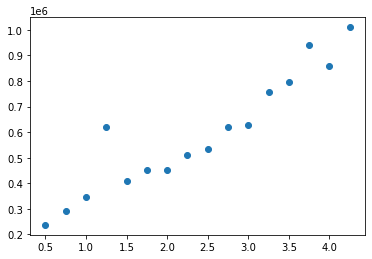

In [1243]:
# plot bathroom vs. price
plt.scatter(price_bathroom_df.index, price_bathroom_df['price'])

The smallest increment to improving a bathroom is by 0.25. Here, we can identify ideal opportunties to upgrade a bathroom to increase profit.

We see some noticeable jumps after a 0.25 bathroom upgrade for the following and would recommend upgrading bathrooms if the opportunity is there:
- 1 to 1.25
- 3 to 3.25
- 3.5 to 3.75
- 4 to 4.25

Now let's look at condition.

**Condition**

First, we need to know what each incrememnt of the grading scale indicates. However, there is no indication of what 1-5 on the condition scale means. Thus, we should look for the ideal condition to buy a house in, if planning to increase the condition grade by 1. In addition, when referring to correlations between variables, condition and grade had a -0.146896 correlation, indicating basically no relationship.

In [1244]:
condtion_df = pd.read_csv('data/kc_house_data.csv')
condtion_df.groupby('condition')['price'].mean()

condition
1    341067.241379
2    328178.758824
3    542173.057347
4    521374.450414
5    612577.742504
Name: price, dtype: float64

In [1245]:
condtion_df.groupby('condition')['price'].median()

condition
1    270000.0
2    279000.0
3    450250.0
4    440000.0
5    526000.0
Name: price, dtype: float64

In [1246]:
price_mean_by_condition_df = condtion_df.groupby('condition')['price'].mean()
price_median_by_condition_df = condtion_df.groupby('condition')['price'].median()

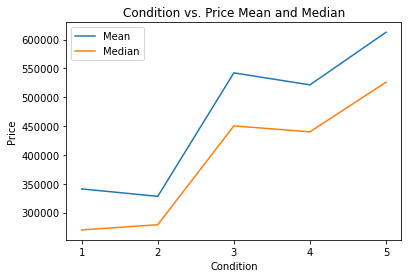

In [1247]:
fig = plt.figure(figsize=(6,4))
plt.title('Condition vs. Price Mean and Median')
plt.xlabel('Condition')
plt.xticks(range(6))
plt.ylabel('Price')
plt.plot(price_mean_by_condition_df, label='Mean')
plt.plot(price_median_by_condition_df, label='Median')
plt.legend()

Here, the most obvious choice would be turning a condition 2 home into a condition 3 home, as we see that the plots are steepest between these two points.



**Grade**

Grade is determined by the King County scale:
- 1-3 Falls short of minimum building standards. Normally cabin or inferior structure.
- 4 Generally older, low quality construction. Does not meet code.
- 5 Low construction costs and workmanship. Small, simple design.
- 6 Lowest grade currently meeting building code. Low quality materials and simple designs.
- 7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.
- 8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.
- 9 Better architectural design with extra interior and exterior design and quality.
- 10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.
- 11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.
- 12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.
- 13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [1248]:
grade_df = pd.read_csv('data/kc_house_data.csv')

In [1249]:
grade_df.groupby('grade')['price'].mean()

grade
3     2.620000e+05
4     2.120019e+05
5     2.485240e+05
6     3.019166e+05
7     4.025946e+05
8     5.429868e+05
9     7.737382e+05
10    1.072347e+06
11    1.497792e+06
12    2.202528e+06
13    3.710769e+06
Name: price, dtype: float64

In [1250]:
grade_df.groupby('grade')['price'].median()

grade
3      262000.0
4      200000.0
5      228700.0
6      275276.5
7      375000.0
8      510000.0
9      720000.0
10     914327.0
11    1280000.0
12    1820000.0
13    2980000.0
Name: price, dtype: float64

In [1251]:
price_mean_by_grade_df = grade_df.groupby('grade')['price'].mean()

In [1252]:
price_median_by_grade_df = grade_df.groupby('grade')['price'].median()

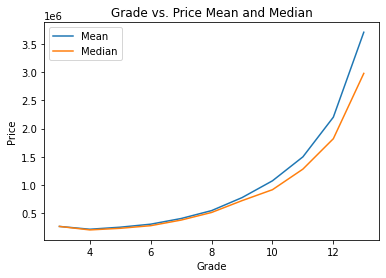

In [1253]:
fig = plt.figure(figsize=(6,4))
plt.title('Grade vs. Price Mean and Median')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.plot(price_mean_by_grade_df, label='Mean')
plt.plot(price_median_by_grade_df, label='Median')
plt.legend()

Both the mean and median of prices seem to increase exponentially depending on the grade. The average house-flipper would probably like to focus less on large, luxurious homes, and more on houses that are relatively more affordable and liquid. Looking at the grading system, a 10 grade takes into account floor plans and a larger square footage, which are more difficult to address when aiming to flip or renovate. Thus, house flippers should aim to reach as close to a 9 grade while minimizing costs. The recommendation for the lowest grade of house to buy would be a 5, as fixing a building to reach minimum building codes (5 to 6) would probably cost less than $50k, which is roughly the difference in sale prices for both the median and mean. 

In [1254]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,1.983600e+04,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,...,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000,19836.000000
mean,4.891005e+05,3.315084,2.038579,1946.600474,9570.022484,1.480314,1970.213400,64.295927,47.560487,-122.220826,1903.911373,8751.673624,0.003277,0.014166,0.037911,0.017292,0.008570,0.007713,0.647762,0.264670,0.078443,0.001361,0.011494,0.099768,0.438647,0.291188,0.113884,0.037961,0.005545,0.000101,0.009881,0.013662,0.010889,0.007058,0.019460,0.006755,0.013612,0.003882,0.009427,0.003983,0.008117,0.008873,0.024350,0.002117,0.015729,0.013914,0.015527,0.012603,0.013460,0.006201,...,0.019762,0.021779,0.021527,0.013712,0.003226,0.012301,0.019964,0.015880,0.007512,0.014872,0.004789,0.029794,0.010385,0.016737,0.013158,0.009276,0.005092,0.010990,0.028887,0.016082,0.027425,0.024753,0.008722,0.014015,0.020065,0.017746,0.024602,0.012956,0.016384,0.014368,0.002874,0.021678,0.012049,0.013460,0.011696,0.012855,0.006705,0.013662,0.014771,0.058429,0.087114,0.103549,0.109649,0.101129,0.101885,0.090038,0.082930,0.086862,0.065588,0.068058
std,2.415012e+05,0.853372,0.690893,729.474879,10305.656756,0.539050,29.491425,352.431898,0.139045,0.136821,588.228013,7390.522090,0.057152,0.118179,0.190986,0.130360,0.092181,0.087488,0.477680,0.441169,0.268875,0.036870,0.106596,0.299698,0.496234,0.454321,0.317678,0.191107,0.074263,0.010041,0.098914,0.116086,0.103785,0.083716,0.138137,0.081915,0.115875,0.062185,0.096638,0.062984,0.089728,0.093779,0.154136,0.045967,0.124428,0.117137,0.123641,0.111558,0.115238,0.078503,...,0.139185,0.145964,0.145135,0.116297,0.056712,0.110228,0.139879,0.125015,0.086346,0.121

In [1255]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,waterfront_1,view_1,view_2,view_3,view_4,condition_2,condition_3,condition_4,condition_5,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,...,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
price,1.000000,0.292506,0.445085,0.618418,0.083629,0.272637,0.021035,0.104416,0.414810,0.008567,0.540648,0.086091,0.102119,0.092592,0.147742,0.152967,0.168805,-0.065121,-0.003812,-0.024078,0.070632,-0.042362,-0.108789,-0.259457,-0.323985,0.122002,0.364497,0.349296,0.180876,0.032887,-0.106103,-0.099941,0.220412,0.088583,0.123373,0.039104,0.043030,-0.028861,-0.002766,-0.028823,-0.029988,-0.085222,-0.138508,-0.017059,0.039608,-0.015917,0.049931,-0.091946,-0.093594,-0.078657,...,-0.049004,-0.091985,-0.023169,0.005049,-0.009266,0.019992,0.085613,0.128488,0.049997,-0.092293,0.078632,0.067049,0.117557,-0.092259,0.034318,-0.054077,0.088927,0.168905,0.085087,0.057340,0.056358,-0.056276,0.110695,0.056532,-0.019058,-0.036119,-0.067641,0.020945,0.023166,-0.065767,-0.045391,-0.056715,-0.028703,-0.120940,0.044845,-0.088754,-0.070528,-0.094987,0.118089,-0.022545,0.006729,0.032874,0.006476,0.022814,0.003752,-0.007856,-0.005700,-0.001142,-0.018401,-0.015433
bedrooms,0.292506,1.000000,0.492572,0.607504,0.107770,0.167085,0.167329,0.004178,-0.034185,0.149163,0.393832,0.120057,-0.031508,0.010229,0.031570,0.024892,-0.006771,-0.048760,0.002287,-0.003105,0.021474,-0.074521,-0.118516,-0.245925,-0.080069,0.105470,0.178759,0.107191,0.049594,0.008060,-0.003438,-0.001215,0.030706,0.042969,0.063030,0.041671,0.053497,-0.006899,0.024502,-0.028976,0.009397,-0.019186,0.019093,-0.008012,0.019321,0.020193,0.010968,0.021834,0.020954,0.005452,...,0.015487,0.032738,0.061653,0.024027,-0.038716,0.011855,0.044443,0.070767,0.024668,0.028821,-0.021335,-0.067832,0.005299,-0.038042,-0.047301,-0.014775,-0.014794,-0.001523,-0.023824,-0.041569,-0.063449,-0.044375,-0.018749,-0.030954,-0.022078,-0.076924,-0.038808,-0.053796,-0.025317,-0.028694,-0.010992,-0.010339,0.003625,-0.045180,0.002693,-0.003853,0.008031,-0.019536,-0.024642,-0.004328,-0.000726,0.002292,-0.013104,0.015860,0.010002,-0.004280,0.004432,-0.007738,-0.009766,0.006248
bathrooms,0.445085,0.492572,1.000000,0.711996,0.045662,0.517111,0.539354,0.032364,0.001824,0.231650,0.523091,0.055082,-0.001287,0.023099,0.058072,0.065224,0.034587,-0.076654,0.196233,-0.171822,-0.035425,-0.060448,-0.143277,-0.383878,-0.282769,0.274041,0.305300,0.228225,0.102935,0.021241,-0.035641,-0.004686,0.012246,0.029723,0.055128,0.010539,-0.000577,-0.011407,0.030798,-0.018593,0.036628,-0.024931,-0.001484,-0.021225,0.064782,0.014703,0.088451,0.016912,0.014691,-0.037875,...,-0.004783,0.005791,0.047150,0.077652,-0.015079,0.023559,0.078759,0.111545,0.034440,0.032626,0.011188,-0.032318,0.002737,-0.046107,-0.003726,-0.017202,0.002157,0.014936,-0.046881,-0.016421,-0.059642,-0.071125,0.011831,-0.003709,-0.051443,-0.071619,-0.071283,-0.031724,-0.012668,-0.071433,-0.019015,-0.061551,-0.031582,-0.104040,-0.008450,-0.053983,-0.027389,-0.046017,0.006621,-0.017488,-0.019514,0.000302,-0.0